## CMTH642 - Data Analytics: Advanced Methods  
### Assignment 1


*****
Assignment 1 is worth 15% of the final grade. Submit the ipynb file and the generated pdf output file. Failing to submit both files will be subject to a mark deduction.
*****



### Preparation

The dataset is related to Forest Fires. For more info: https://archive.ics.uci.edu/ml/datasets/forest+fires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Q1.

Read the csv file from the this URL https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv. Save it to a data frame called Forest. Check the first five records. (10 points)
[Relevant Pandas API](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)


In [2]:
# INSERT YOUR ANSWER HERE
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"

forest_df = pd.read_csv(url)

# check first 5 records
forest_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# Q2.
How many observations are there in the dataset? How many observations are there with both a significant fire (burned area > 0) and rain? (10 points) [Relevent API1](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.shape.html) , [Relevant Pandas API 2](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html#)

In [3]:
# INSERT YOUR ANSWER HERE
# total number of observations
total_observations = len(forest_df)
print(total_observations)

517


In [4]:
# number of observations with both significant fire and rain
significant_fire_and_rain = len(forest_df[(forest_df['area'] > 0) & (forest_df['rain'] > 0)])
print(significant_fire_and_rain)

2


# Q3.
Show the columns month, day, area of all the observations with a significant fire (burned area >0 ). (10 points) [Relevant Pandas API](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)

In [5]:
# INSERT YOUR ANSWER HERE
# rows with a significant fire (burned area > 0)
significant_fire_observations = forest_df[forest_df['area'] > 0]

cols_with_fire = significant_fire_observations[['month', 'day', 'area']]

print(cols_with_fire)

    month  day   area
138   jul  tue   0.36
139   sep  tue   0.43
140   sep  mon   0.47
141   aug  wed   0.55
142   aug  fri   0.61
..    ...  ...    ...
509   aug  fri   2.17
510   aug  fri   0.43
512   aug  sun   6.44
513   aug  sun  54.29
514   aug  sun  11.16

[270 rows x 3 columns]


# Q4.
How large are the five largest fires (i.e. having largest area)? (10 points) [Relevant API](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)

In [6]:
# INSERT YOUR ANSWER HERE
# Find the five largest fires based on 'area' column
largest_fires = forest_df.nlargest(5, 'area')

print(largest_fires[['area']])

        area
238  1090.84
415   746.28
479   278.53
237   212.88
236   200.94


# Q5.
For the records you obtained from the previous question, what are the corresponding month, temp, RH, wind, rain, area? (10 points)

In [7]:
# INSERT YOUR ANSWER HERE
largest_fires_for_select_cols = largest_fires[['month', 'temp', 'RH', 'wind', 'rain', 'area']]

print(largest_fires_for_select_cols)

    month  temp  RH  wind  rain     area
238   sep  25.1  27   4.0   0.0  1090.84
415   aug  27.5  27   4.9   0.0   746.28
479   jul  22.6  57   4.9   0.0   278.53
237   sep  18.8  40   2.2   0.0   212.88
236   sep  18.2  46   1.8   0.0   200.94


# Q6.
For the whole dataset, reorder factor levels of month to be from Jan to Dec. (10 points)

In [8]:
# INSERT YOUR ANSWER HERE
# Define the desired order of months
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Reorder the 'month' column using Categorical with the custom order
forest_df['month'] = forest_df['month'].astype('category').cat.reorder_categories(month_order, ordered=True)

# Display the first few rows of the updated DataFrame to verify the order
print(forest_df.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


# Q7.
Add one column to the data indicating whether a fire occurred for each observation ('TRUE' for area>0 and 'FALSE' for area==0). (10 points)

In [9]:
# INSERT YOUR ANSWER HERE
forest_df['fire_occurred'] = np.where(forest_df['area'] > 0, 'TRUE', 'FALSE')

print(forest_df.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

  fire_occurred  
0         FALSE  
1         FALSE  
2         FALSE  
3         FALSE  
4         FALSE  


# Q8.
What is the mean area/wind/temp/RH per month? (10 points)

In [10]:
# INSERT YOUR ANSWER HERE
monthly_means = forest_df.groupby('month')[['area', 'wind', 'temp', 'RH']].mean()

print(monthly_means)

            area      wind       temp         RH
month                                           
jan     0.000000  2.000000   5.250000  89.000000
feb     6.275000  3.755000   9.635000  55.700000
mar     4.356667  4.968519  13.083333  40.000000
apr     8.891111  4.666667  12.044444  46.888889
may    19.240000  4.450000  14.650000  67.000000
jun     5.841176  4.135294  20.494118  45.117647
jul    14.369687  3.734375  22.109375  45.125000
aug    12.489076  4.086413  21.631522  45.489130
sep    17.942616  3.557558  19.612209  42.843023
oct     6.638000  3.460000  17.093333  37.466667
nov     0.000000  4.500000  11.800000  31.000000
dec    13.330000  7.644444   4.522222  38.444444


# Q9.
How many observations are there in each month? Visualize by using a barplot in descending order. (10 points) [Relevant API 1](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) [Relevant API  2](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

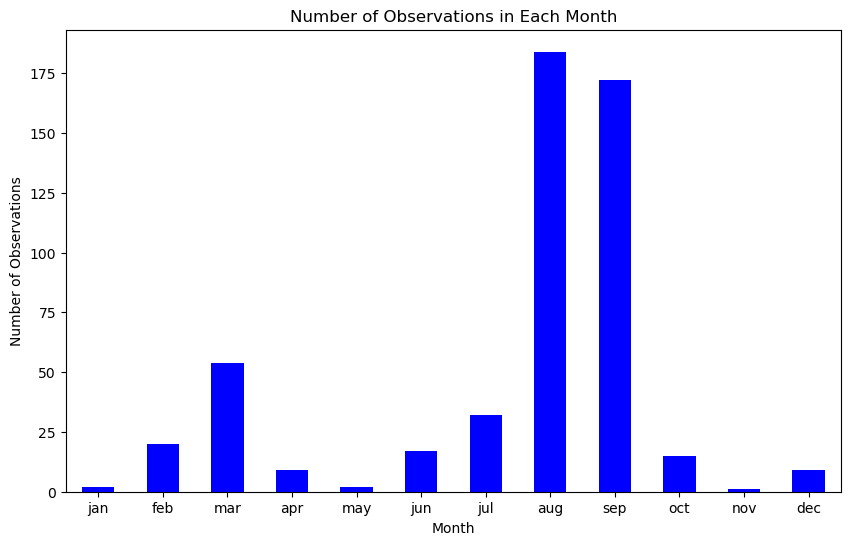

In [11]:
# INSERT YOUR ANSWER 
month_counts = forest_df['month'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='blue')
plt.title("Number of Observations in Each Month")
plt.xlabel("Month")
plt.ylabel("Number of Observations")
plt.xticks(rotation=0)
plt.show()

# Q10.
How many observations are there with burned area greater than zero in each month? Visualize by using a barplot in descending order. (10 points)

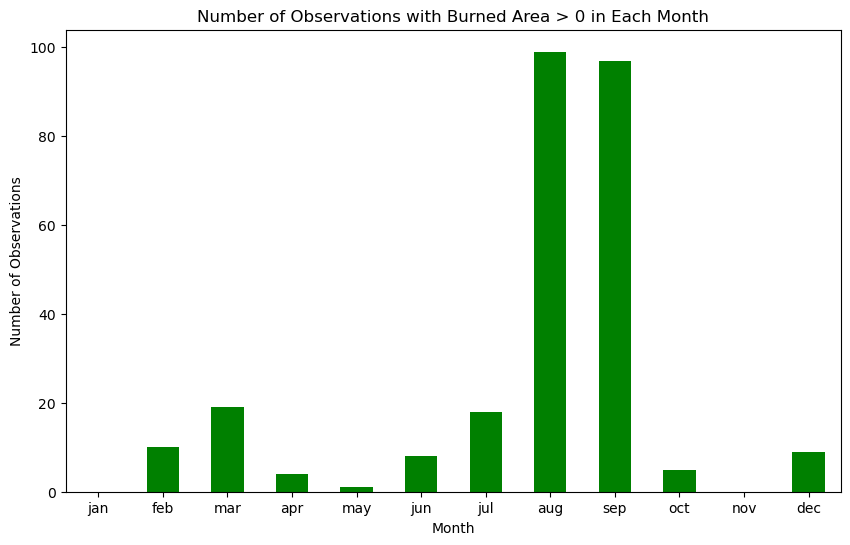

In [12]:
# INSERT YOU ANSWER HERE
# filter burned area greater than zero
burned_area_gt_zero = forest_df[forest_df['area'] > 0]

# Group the filtered data by the 'month' column and count the number of observations in each month
month_counts = burned_area_gt_zero['month'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='green')
plt.title("Number of Observations with Burned Area > 0 in Each Month")
plt.xlabel("Month")
plt.ylabel("Number of Observations")
plt.xticks(rotation=0)
plt.show()

This is the end of Assignment 1

Ceni Babaoglu, PhD